In [2]:
#Read CSV file
# !pip install --upgrade pip
# !pip install --upgrade
# !pip install sympy

import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats
from scipy.stats import uniform
import sympy as sp
from sympy import symbols, Eq, solve

## Problem 01.
Generate vector of 10000 random numbers

In [3]:
# a. Plot CDF
# data = np.random.rand(10000) # Uniform dist (0~1) 
n = 10000
data = uniform.rvs(size=n)

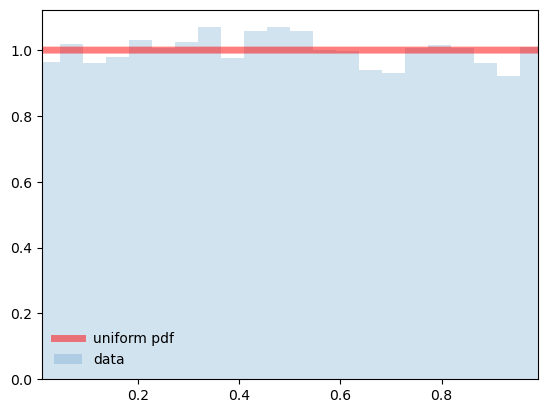

In [4]:
# Visualization of PDF
fig, ax = plt.subplots(1, 1)
x = np.linspace(uniform.ppf(0.01),uniform.ppf(0.99), n)
ax.plot(x, uniform.pdf(x), 'r-', lw=5, alpha=0.5, label='uniform pdf')
ax.hist(data, density = True, bins = 'auto', histtype = 'stepfilled', alpha = 0.2, label='data')
ax.set_xlim([x[0], x[-1]])
ax.legend(loc='best', frameon=False)
plt.show()

In [5]:
# b. Find
# b.1) Mean 
meanD = np.mean(data)

# b.2) Mean of the square 
meanDsquare = np.mean(data**2)
print(meanD, meanDsquare)

# b.3) Variance from python and compare it with E(X^2)-E(X)^2
varD = np.var(data)
varD_cal = meanDsquare-meanD**2

print('Variance is directly from data is', varD, ', and it is same with the E(X^2)-E(X)^2:', varD_cal)

0.49744968677001816 0.32945087013341934
Variance is directly from data is 0.08199467926583026 , and it is same with the E(X^2)-E(X)^2: 0.08199467926583015


## Problem 2. Consider pipe leak location problem. 
Let’s consider the pipe leak location problem, in which the probability density function 

increases linearly from the left end of the pipe to the right end of the pipe and is twice as high 

on the right end as the left end. Recall the that the PDF and CDF are

![](https://imgur.com/euYqH9n.png)

In [6]:
# a. Solve  the  CDF  formula  for 𝑥.  In  other  words,  suppose 𝐹𝑋(𝑥)=𝑝,  what  must x be? 
# Write formula for xas a function of p. 
x, l, p = symbols('x l p')
eqn = Eq((x**2)/(2*l)+x-p*(3*l)/2, 0) # LHS, RHS
eqn

Eq(-3*l*p/2 + x + x**2/(2*l), 0)

In [7]:
xCDF = solve(eqn, x)
x_sol = xCDF[0] # X cannot be negative
x_sol

l*(sqrt(3*p + 1) - 1)

In [9]:
# b. Solve CDF formula for x
xValues = np.zeros(10000)

In [10]:
for i in range(0, 10000, 1):
    xValues[i] = x_sol.evalf(subs={p: data[i], l: 1})
print(xValues)

[0.49196004 0.67363956 0.61836828 ... 0.73260045 0.27813205 0.65757925]


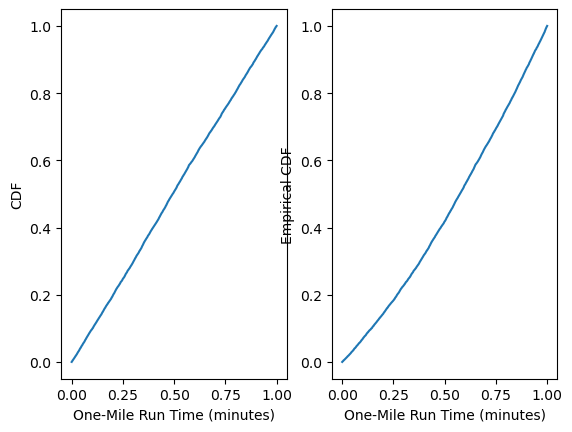

In [12]:
# c. Plot CDF
from statsmodels.distributions.empirical_distribution import ECDF
data_cdf = ECDF(data)
xValues_cdf = ECDF(xValues)

fig, ax = plt.subplots(1, 2)
ax[0].plot(data_cdf.x, data_cdf.y)
ax[1].plot(xValues_cdf.x, xValues_cdf.y)
ax[0].set_xlabel('One-Mile Run Time (minutes)')
ax[0].set_ylabel('CDF')
ax[1].set_xlabel('One-Mile Run Time (minutes)')
ax[1].set_ylabel('Empirical CDF')
plt.show()

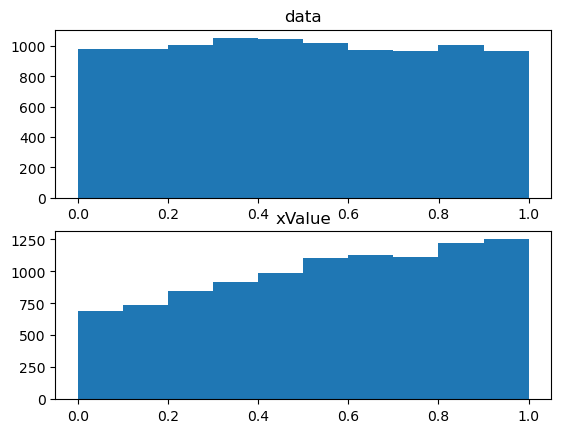

In [13]:
# d. Plot PDF(histogram)
plt.subplot(2, 1, 1) 
plt.hist(data); plt.title('data')
plt.subplot(2, 1, 2) 
plt.hist(xValues); plt.title('xValue')
plt.show()

In [14]:
# e. Find i), ii), iii)
# i) The mean of the numbers generated in b) 
meanD = np.mean(xValues)

# ii) The mean of the square of the numbers generated in b) 
meanDsquare = np.mean(xValues**2)
print(meanD, meanDsquare)

# iii) Variance of the numbers generated in b) using Python variance. Show this is equals the result of (ii) minus the square of the result of (i)
varD = np.var(xValues)
varD_cal = meanDsquare-meanD**2
print('Variance is directly from data is', varD, ', and it is same with the E(X^2)-E(X)^2:', varD_cal)

0.5535350222586402 0.38527901579277407
Variance is directly from data is 0.07887799492590077 , and it is same with the E(X^2)-E(X)^2: 0.07887799492590081


[1.70371116 1.23571633 0.06415642 ... 2.01239505 1.00665058 0.45044413]


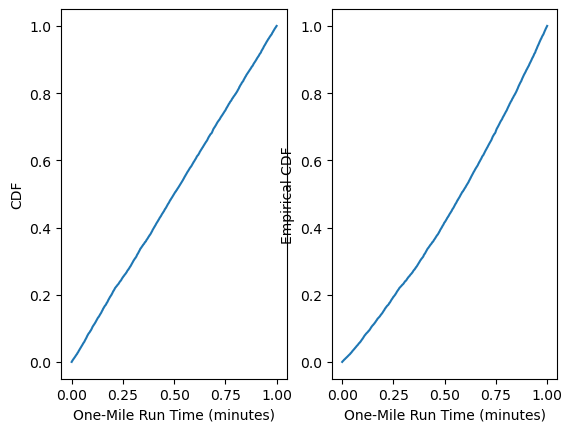

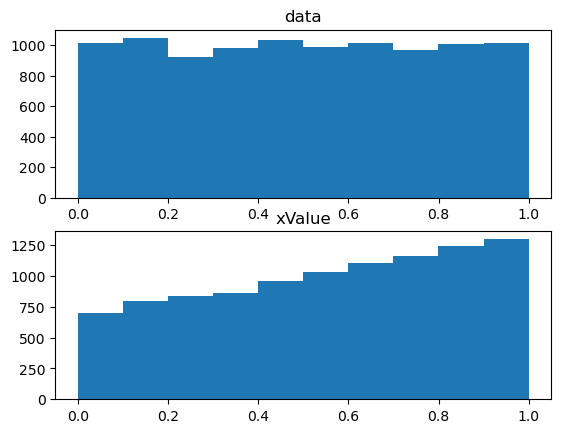

In [23]:
# f. PDF, CDF assumes the pipe location is in inches. Convert it to the cm^2
# Provide your answer
import numpy as np
from scipy.stats import uniform
from sympy import symbols, Eq, solve

n = 10000
data = uniform.rvs(size=n)

x, l, p = symbols('x l p')
eqn = Eq((x**2)/(2*l)+x-p*(3*l)/2, 0) # LHS, RHS

xCDF = solve(eqn, x)
x_sol = xCDF[0] # X cannot be negative

xValues = np.zeros(10000)

for i in range(0, 10000, 1):
    xValues[i] = x_sol.evalf(subs={p: data[i], l: 1})

# 인치를 센티미터로 변환
xValues_cm = xValues * 2.54
print(xValues_cm)

data_cdf = ECDF(data)
xValues_cdf = ECDF(xValues)

fig, ax = plt.subplots(1, 2)
ax[0].plot(data_cdf.x, data_cdf.y)
ax[1].plot(xValues_cdf.x, xValues_cdf.y)
ax[0].set_xlabel('One-Mile Run Time (minutes)')
ax[0].set_ylabel('CDF')
ax[1].set_xlabel('One-Mile Run Time (minutes)')
ax[1].set_ylabel('Empirical CDF')
plt.show()

plt.subplot(2, 1, 1) 
plt.hist(data); plt.title('data')
plt.subplot(2, 1, 2) 
plt.hist(xValues); plt.title('xValue')
plt.show()


## Problem 3. How the expectation and variance changes when we add two random variables. 

In [20]:
# a. Generate two random vectors X and Y, of size 10000 following uniform distribution. 
# Provide your answer
n = 10000
X = uniform.rvs(size=n) # uniform dist
Y = uniform.rvs(size=n) # uniform dist

print(X, Y)

[0.19590378 0.29546162 0.54377887 ... 0.13765813 0.44073603 0.34509679] [0.20201681 0.4994954  0.92807451 ... 0.03305562 0.54451204 0.03844684]


In [22]:
# b. Generate two random vectors A and B of size 10000 

# A follows Uniform distribution b/w 0 and 1 
A = np.random.rand(n)

# B follows Normal distribution with 0 and 1 (mu = 0, std = 1)
B = np.random.randn(n)

print(A, B)


[0.52411253 0.78158592 0.08869125 ... 0.65457637 0.53736205 0.74048178] [-2.13274093  0.27866325  0.17074179 ...  1.1489644   0.54639905
 -0.92267399]
